In [25]:
import os
from PIL import Image
import pandas as pd
import random
os.getcwd()

'/Users/jpgard/Documents/github/dro/notebooks'

In [26]:
fp = "../embeddings/embedding.csv"
embeddings = pd.read_csv(fp, index_col=0)
print(embeddings.shape)
embeddings.head()

(97, 512)


,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
/Users/jpgard/Documents/github/dro/tmp/mouth_open_tiny_cropped/n000711/0054_01.jpg,0.004638,0.005107,0.032429,0.032710,0.011156,0.003895,0.002049,0.022585,0.014044,0.009593,...,0.085511,0.039823,0.005095,0.080276,0.006925,0.003781,0.037971,0.038029,0.036948,0.009964
/Users/jpgard/Documents/github/dro/tmp/mouth_open_tiny_cropped/n000711/0224_02.jpg,0.000000,0.029451,0.045836,0.026203,0.001174,0.005572,0.020244,0.018221,0.037658,0.006295,...,0.046876,0.054618,0.008382,0.042028,0.010338,0.000723,0.011409,0.003936,0.041302,0.015654
/Users/jpgard/Documents/github/dro/tmp/mouth_open_tiny_cropped/n000711/0095_01.jpg,0.000000,0.027912,0.023330,0.022142,0.002603,0.024675,0.016484,0.082669,0.016182,0.008287,...,0.039520,0.038096,0.008121,0.051435,0.004829,0.002742,0.011095,0.004887,0.034651,0.004459
/Users/jpgard/Documents/github/dro/tmp/mouth_open_tiny_cropped/n000711/0173_01.jpg,0.002571,0.003660,0.007260,0.020728,0.000467,0.008988,0.000893,0.039371,0.022356,0.001948,...,0.073343,0.018622,0.008223,0.051204,0.013283,0.000000,0.019872,0.000510,0.018713,0.009205
/Users/jpgard/Documents/github/dro/tmp/mouth_open_tiny_cropped/n001897/0170_01.jpg,0.001030,0.006649,0.017692,0.033954,0.011015,0.011091,0.006767,0.010083,0.010952,0.005726,...,0.006583,0.038821,0.002859,0.014988,0.017429,0.002624,0.007155,0.014669,0.049838,0.009951


In [27]:
# take the first image and find its most similar
from sklearn.metrics.pairwise import cosine_similarity
similarities = cosine_similarity(embeddings.values)

Text(0.5, 1.0, 'Similarity Matrix of Annotated VGGFace2 Faces\nCosine Distance on VGGFace Embeddings')

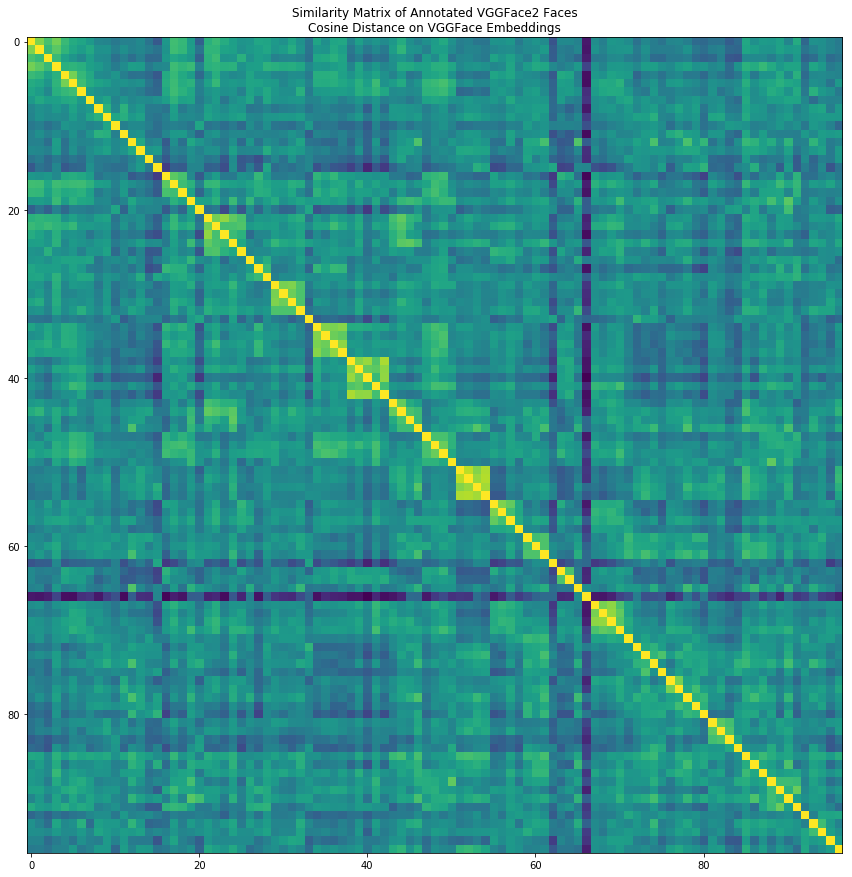

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.imshow(similarities)
plt.title("Similarity Matrix of Annotated VGGFace2 Faces\nCosine Distance on VGGFace Embeddings")

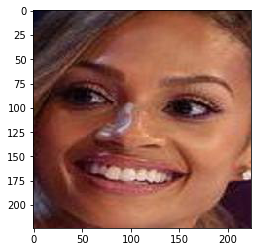

In [6]:
# random.seed(2994)
i = random.randint(0, embeddings.shape[0])
fp = embeddings.index[i]
im = Image.open(fp)
plt.imshow(im)

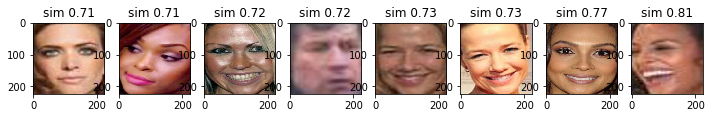

In [7]:
%matplotlib inline
k=8
# find neighbors; note that argsort sorts in ascending order, 
# so we take the last k elements (exlcluding the image itself as a neighbor)
nbrs = similarities[i,:].argsort()[-(k+1):-1]  
sims = similarities[i,nbrs]
nbrs = embeddings.index[nbrs]
fig = plt.figure(figsize=(12,12))
for count in range(1, k+1):
    ax = fig.add_subplot(1, k, count)
    fp = nbrs[count-1]
    im = Image.open(fp)
    ax.imshow(im)
    ax.set_title("sim %01.2f" % sims[count-1])

In [8]:
import umap
reducer = umap.UMAP()

In [9]:
umap_2d = reducer.fit_transform(embeddings.values)
umap_2d.shape

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/umap/umap_.py:328: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "../../../../../../Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/umap/umap_.py", line 446:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numba/object_mode_passes.py:178: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File "../../../../../../Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/umap/umap_.py", line 329:
@numba.jit()
def fu

(97, 2)

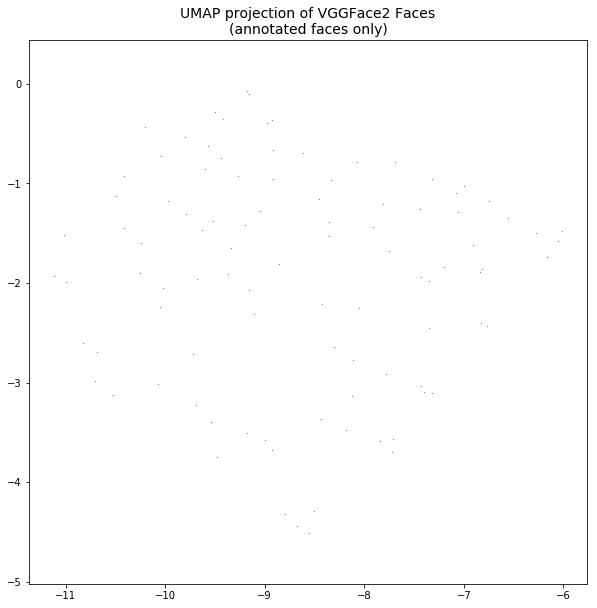

In [10]:
# TODO: plot UMAP scatter
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(umap_2d[:, 0], umap_2d[:, 1], s=0.1)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of VGGFace2 Faces\n(annotated faces only)', fontsize=14);

In [47]:
import numpy as np
from dppy.finite_dpps import FiniteDPP
rng = np.random.RandomState(1)
# sets similarities > 1 to 1 to correct for numerical imprecision in similarity
np.fill_diagonal(similarities, 1) 
n_batches = 6
batch_size = 16

In [50]:
# DPP = FiniteDPP(kernel_type='correlation', K=similarities)
DPP = FiniteDPP(kernel_type='likelihood', L=similarities)
for _ in range(n_batches):
    DPP.sample_exact_k_dpp(size=batch_size, random_state=rng)

In [51]:
print(DPP.list_of_samples)

[[36, 8, 95, 18, 77, 82, 65, 54, 16, 44, 32, 22, 61, 29, 84, 81], [35, 84, 67, 65, 17, 41, 55, 96, 16, 21, 24, 71, 38, 9, 51, 27], [75, 10, 60, 1, 54, 0, 92, 86, 79, 88, 11, 14, 17, 58, 84, 95], [9, 7, 45, 39, 94, 18, 93, 76, 81, 62, 64, 47, 1, 33, 52, 70], [81, 20, 37, 30, 6, 89, 36, 51, 46, 12, 21, 7, 52, 27, 39, 16], [95, 7, 31, 91, 1, 78, 82, 42, 25, 76, 45, 11, 89, 86, 40, 75]]


In [52]:
sample_batch = DPP.list_of_samples[0]
umap_2d[sample_batch, :]

array([[ -6.83901   ,  -1.8878291 ],
       [-10.016838  ,  -2.0546534 ],
       [ -9.106531  ,  -2.310418  ],
       [ -7.3503604 ,  -1.9794959 ],
       [-10.415483  ,  -1.4495246 ],
       [-10.991604  ,  -1.9879661 ],
       [ -9.570072  ,  -0.6187867 ],
       [-10.679427  ,  -2.693661  ],
       [ -7.1971807 ,  -1.8383517 ],
       [ -9.694297  ,  -3.2295482 ],
       [ -8.507066  ,  -4.291704  ],
       [ -8.181273  ,  -3.480083  ],
       [ -9.519921  ,  -1.3795626 ],
       [ -8.558081  ,  -4.514628  ],
       [-10.206818  ,  -0.43222538],
       [-11.112491  ,  -1.9262781 ]], dtype=float32)

0
1
2
3
4
5


Text(0.5, 0.98, 'DPP-based batch samples')

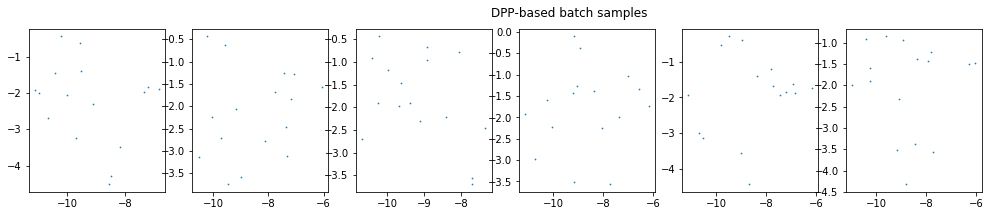

In [58]:
%matplotlib inline
plt.figure(figsize=(20,3))
for i,sample_batch in enumerate(DPP.list_of_samples):
    print(i)
    batch_coords = umap_2d[sample_batch, :]
    plt.subplot(1, n_batches+1, i+1)
    plt.scatter(x=batch_coords[:,0], y=batch_coords[:,1], s=0.5)
plt.suptitle("DPP-based batch samples")

0.22628536464577093